In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay, auc

In [ ]:
def get_model():
    #write your model here
    return model

model = None
model = get_model()
model.summary()

In [14]:
weight_path = #add your model weight
model.load_weights(weight_path)

# compile model if you want to call evaluation function
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['acc',tf.keras.metrics.AUC(curve='ROC')])

### Follow this or assign your own data

In [16]:
abnormal_scans = # add your negative data
    
normal_scans = # add your positive data


# assign 1, for the normal ones assign 0.
abnormal_labels = np.array([1 for _ in range(len(abnormal_scans))]) # or assigns your label
normal_labels = np.array([0 for _ in range(len(normal_scans))])

x_val =  np.concatenate((abnormal_scans, normal_scans), axis=0)
y_val = np.concatenate((abnormal_labels, normal_labels), axis=0)
len(y_val)

3403

In [18]:
prediction = model.predict(x_val, batch_size=2)

1702/1702 [==============================] - 50s 29ms/step


In [19]:
scores = []

for i in prediction:
    if i < 0.5:
        scores.append(0)
    else:
        scores.append(1)
        

fpr, tpr, thresholds = roc_curve(scores, y_val)
cr = classification_report(y_val, scores)
acc = accuracy_score(scores, y_val)
auc1 = auc(fpr, tpr)
roc_auc = roc_auc_score(y_val, prediction)
print(acc,'\n', cr)
print(auc1, roc_auc)
cm = confusion_matrix(scores, y_val)
cm

0.8166323831913018 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2131
           1       0.75      0.76      0.75      1272

    accuracy                           0.82      3403
   macro avg       0.80      0.80      0.80      3403
weighted avg       0.82      0.82      0.82      3403

0.804119570290811 0.886967688716137


array([[1818,  311],
       [ 313,  961]])

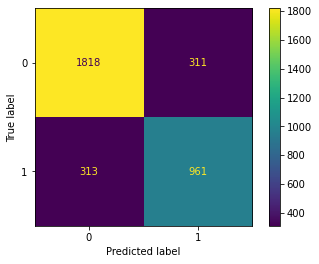

In [20]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

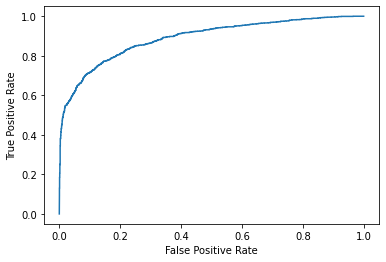

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_val, prediction, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()